# Bayesian Linear Regression

[[0]
 [0]] [[25.  0.]
 [ 0. 25.]]
[[1.03966118]
 [0.97707444]] [[ 1.63725368 -0.73457614]
 [-0.73457614  0.65852495]]
[[0]
 [0]] [[25.  0.]
 [ 0. 25.]]
[[1.01611226]
 [0.86610466]] [[ 0.20223463 -0.06218694]
 [-0.06218694  0.06902262]]
[[0]
 [0]] [[25.  0.]
 [ 0. 25.]]
[[0.98336578]
 [0.74813046]] [[0.0311386  0.0016978 ]
 [0.0016978  0.01008857]]


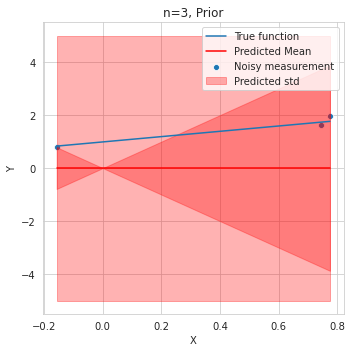

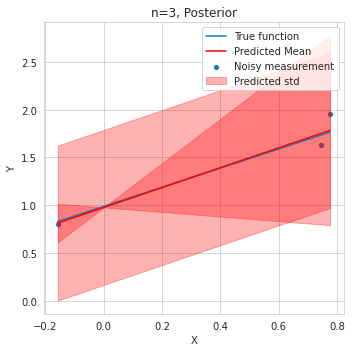

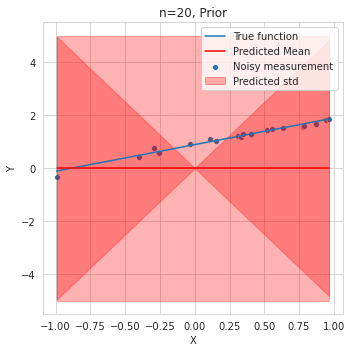

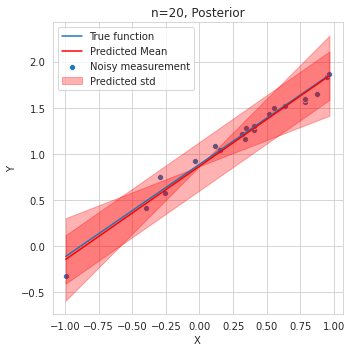

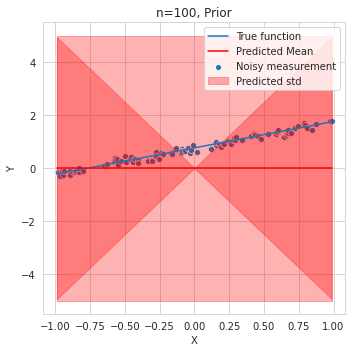

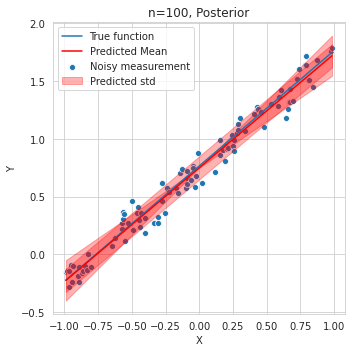

In [178]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

def gen_data(n=100, eps=0.1):
    X = np.random.uniform([-1,1],[1,1],(n,2))
    X = np.sort(X, axis=0)
    m = np.random.normal(loc=1, scale=0.01)
    c = np.random.uniform(-1,1)
    w = np.reshape([m,c], (2,1))
    Y_true = np.matmul(X,w)
    eps = np.random.normal(scale=eps, size=(n,1))
    Y = Y_true + eps
    return X,Y,Y_true



def visualize(X, Y, Y_true, mu, sigma, title=None):
    plt.figure(figsize=(5,5))
    sns.scatterplot(X[:,0], Y.flatten(), label='Noisy measurement')
    sns.lineplot(X[:,0], Y_true.flatten(), label='True function')
    plt.xlabel('X')
    plt.ylabel('Y')
    if not title is None:
        plt.title(title)
    
    # estimation
    Y_pred = np.matmul(X,mu)
    sns.lineplot(X[:,0].flatten(), Y_pred.flatten(), color='red', label='Predicted Mean')
    Y0 = np.matmul(X,mu-np.sqrt(np.array([[sigma[0,0]],[0]])))
    Y1 = np.matmul(X,mu+np.sqrt(np.array([[sigma[0,0]],[0]])))
    plt.fill_between(X[:,0].flatten(),Y0[:,0],Y1[:,0], color='red', alpha=0.3, label='Predicted std')
    Y0 = np.matmul(X,mu-np.sqrt(np.array([[0],[sigma[1,1]]])))
    Y1 = np.matmul(X,mu+np.sqrt(np.array([[0],[sigma[1,1]]])))
    plt.fill_between(X[:,0].flatten(),Y0[:,0],Y1[:,0], color='red', alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.savefig('figures/{}'.format(title))
    
for n in [3,20,100]:
#     plt.figure(figsize=(10,5))
    X,Y,Y_true = gen_data(n=n, eps=0.1)
    
    # prior
    mu = np.array([[0],[0]])
    b = 5
    sigma = np.eye(2)*b**2
#     plt.subplot(1,2,1)
    visualize(X,Y,Y_true,mu,sigma,title='n={}, Prior'.format(n))
    print(mu,sigma)

    # likelihood
    a = 1

    # posterior
    ATA = np.matmul(X.T, X)
    Lam = ATA/a**2 + np.eye(2)/b**2
    sigma_post = np.linalg.inv(Lam)
    mu_post = np.matmul(sigma_post, (np.matmul(X.T, Y)/a**2 + mu/b*82))
#     plt.subplot(1,2,2)
    visualize(X,Y,Y_true,mu_post,sigma_post,title='n={}, Posterior'.format(n))
    print(mu_post, sigma_post)